In [1]:
import sympy as sp
import numpy as np
from scipy.differentiate import derivative
import matplotlib.pyplot as plt

Ejemplo 18

Mecanismo biela-manivela

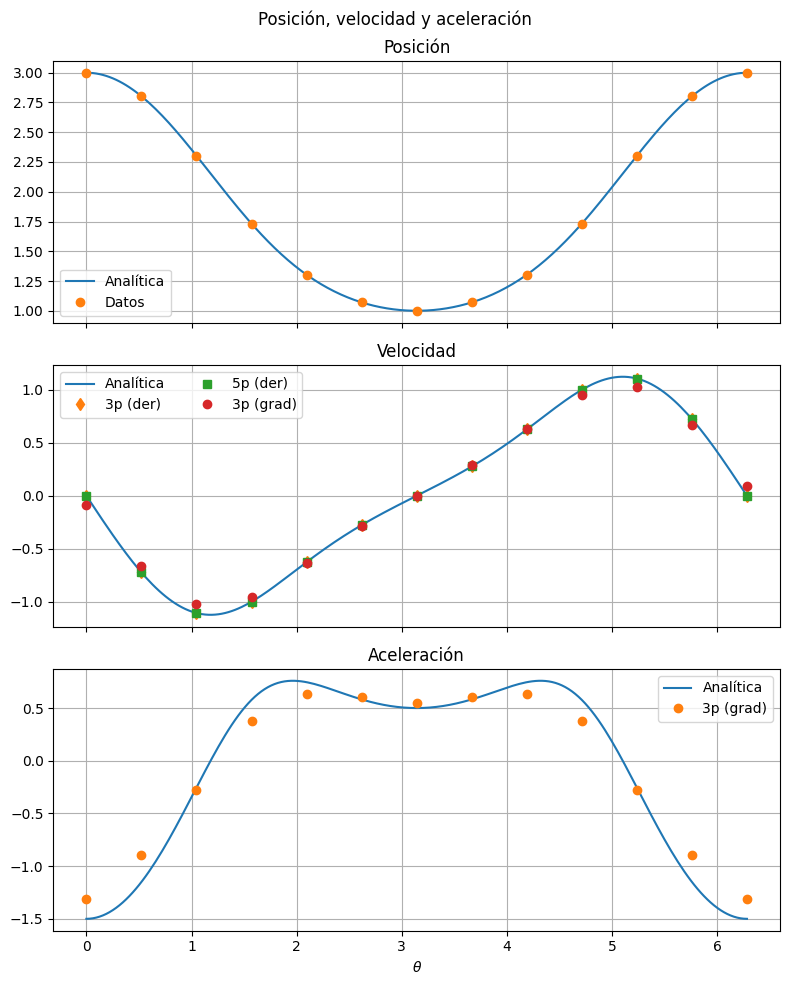

In [2]:
L1 , L2 , h , n = (1 ,2 ,0.01 ,30)
a = sp.symbols("L_:2", real=True)
valor = {a[0]: L1, a[1]: L2}

xs = sp.symbols('x')

pos = a[0]*sp.cos(xs) + sp.sqrt(a[1]**2 - a[0]**2 * sp.sin(xs)**2)
vel = sp.simplify(sp.diff(pos, xs))
ace = sp.simplify(sp.diff(vel, xs))

posa = sp.lambdify(xs, pos.subs(valor), "numpy")
vela = sp.lambdify(xs, vel.subs(valor), "numpy")
acea = sp.lambdify(xs, ace.subs(valor), "numpy")

Theta = np.linspace(0, 2*np.pi, 201)
Xa = posa(Theta)
Va = vela(Theta)
Aa = acea(Theta)

puntos = int(np.ceil(360/n) + 1)
theta = np.linspace(0, 2*np.pi, puntos)
Xn = posa(theta)

# Usando derivative (solo 1ª derivada)
Vn3d = derivative(posa, theta, order=3, maxiter=1, initial_step=h)
Vn5d = derivative(posa, theta, order=5, maxiter=1, initial_step=h)

# Usando gradient y encadenando derivadas
Vn3g = np.gradient(Xn, theta, edge_order=2)
An3g = np.gradient(Vn3g, theta, edge_order=2)
fig, ax = plt.subplots(3, 1, figsize=(8, 10), sharex=True)
plt.suptitle("Posición, velocidad y aceleración")

# --- Posición ---
ax[0].set(title="Posición")
ax[0].plot(Theta, Xa, label="Analítica")
ax[0].plot(theta, Xn, "o", label="Datos")
ax[0].legend()
ax[0].grid(True)

# --- Velocidad ---
ax[1].set(title="Velocidad")
ax[1].plot(Theta, Va, label="Analítica")
ax[1].plot(theta, Vn3d.df, "d", label="3p (der)")
ax[1].plot(theta, Vn5d.df, "s", label="5p (der)")
ax[1].plot(theta, Vn3g, "o", label="3p (grad)")
ax[1].legend(ncol=2)
ax[1].grid(True)

# --- Aceleración ---
ax[2].set(title="Aceleración")
ax[2].plot(Theta, Aa, label="Analítica")
ax[2].plot(theta, An3g, "o", label="3p (grad)")
ax[2].legend()
ax[2].grid(True)

ax[2].set_xlabel(r"$\theta$")

fig.tight_layout()
plt.show()

